In [9]:
import matplotlib.pyplot as plt
import numpy as np

In [3]:
tmp = [147289,147293,147281,147271,147278,147293,147303,147293,147291,147276,147289,147284,147300,147300,147334,147330,147312,147303,147316,147314,147287,147282,147271,147283,147286,147297,147284,147306,147280,147315,147283,147260,147275,147264,147235,147234,147217,147200,147203,147224,147235,147222,147219,147254,147279,147283,147275,147276,147255,147271,147286,147282,147291,147289,147270,147253,147232,147235,147245,147244,147232,147197,147225,147203,147163,147187,147170,147130,147116,147087,147124,147127,147125,147135,147159,147130,147092,147099,147077,147097,147076,147033,147022,147055,147088,147105,147137,147132,147168,147153,147127,147118,147114,147074,147083,147078,147062,147073,147079,147088,147094,147107,147073,147054,147045,147068,147081,147086,147080,147099,147078,147099,147114,147093,147094,147132,147103,147109,147107,147116,147092,147072,147077,147090,147095,147102,147117,147144,147164,147192,147189,147185,147184,147205,147189,147163,147144,147141,147156,147152,147165,147144,147160,147178,147148,147168,147155,147162,147152,147134,147135,147138,147110,147100,147131,147164,147187,147201,147180,147165,147155,147186,147208,147208,147226,147268,147282,147282,147262,147246,147215,147256,147250,147260,147257,147270,147262,147303,147261,147263,147265,147250,147264,147248,147262,147246,147256,147244,147264,147259,147279,147274,147292,147276,147263,147259,147241,147274,147289,147309,147279,147273,147261,147249,147247,147247,147265,147251,147230,147217,147205,147218,147216,147238,147221,147225,147252,147255,147265,147306,147334,147322,147287,147304,147298,147324,147306,147313,147329,147338,147306,147296,147328,147323,147329,147318,147328,147326,147363,147379,147384,147385,147369,147380,147378,147398,147381,147345,147347,147336,147325,147333,147306,147326,147337,147319,147313,147328,147318,147311,147299,147301,147294,147280,147284,147250,147232,147243,147259,147253,147250,147259,147252,147279,147317,147331,147336,147334,147331,147349,147342,147334,147346,147353,147376,147357,147356,147351,147389,147416,147411,147384,147418,147411,147429,147396,147391,147362,147398,147381,147342,147340,147320,147327,147313,147299,147281,147264,147279,147278,147242,147239,147228,147211,147239,147245,147223,147219,147238,147234,147236,147221,147216,147199,147187,147208,147204,147192,147154,147175,147184,147189,147182,147183,147173,147173,147195,147167,147182,147174,147160,147170,147174,147174,147196,147218,147234,147216,147240,147276,147287,147303,147287,147308,147300,147311,147291,147306,147287,147282,147276,147272,147276,147266,147223,147235,147238,147222,147239,147243,147238,147245,147248,147238,147211,147216,147246,147226,147231,147259,147278,147262,147284,147308,147317,147324,147341,147338,147321,147330,147326,147339,147332,147358,147373,147409,147435,147438,147430,147404,147388,147402,147401,147370,147369,147387,147406,147418,147427,147383,147420,147397,147393,147380,147360,147398,147414,147403,147389,147377,147368,147349,147328,147320,147301,147301,147307,147332,147322,147326,147300,147281,147276,147242,147249,147230,147245,147241,147227,147246,147241,147241,147232,147277,147293,147321,147334,147310,147293,147287,147302,147318,147321,147323,147326,147318,147311,147347,147324,147318,147338,147301,147311,147304,147283,147326,147355][::-1]
tmp_odd_even = [0 if tmp[x]%2 == 0 else 1 for x in range(len(tmp))]

In [4]:
tmp1 = [tmp[x+1] - tmp[x] for x in range(len(tmp) - 1)]

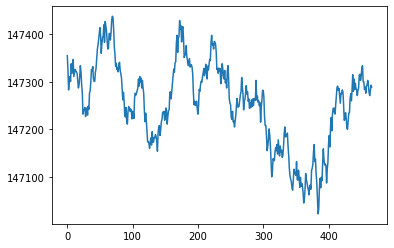

In [5]:
plt.plot(tmp)

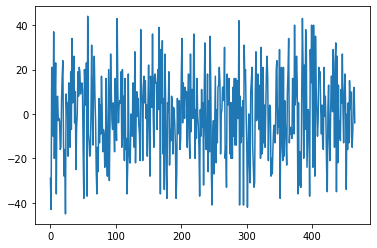

In [6]:
plt.plot(tmp1)

In [10]:
random_walk = [tmp[0]]
for i in range(1,len(tmp)-1):
    random_walk.append(random_walk[i-1] + np.round(np.random.uniform(low=-40, high=40)))
diff = [random_walk[x+1] - random_walk[x] for x in range(len(random_walk) - 1)]
    

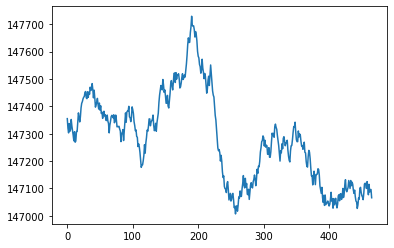

In [12]:
plt.plot(random_walk)

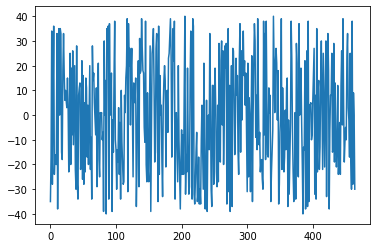

In [13]:
plt.plot(diff)

In [7]:
import math
from copy import deepcopy

import numpy as np
#from tensorflow import keras
from tensorflow.keras.layers import Dense, Activation, LSTM
#from tensorflow.keras.layers.recurrent import LSTM
from tensorflow.keras.models import Sequential

from pm4py.algo.filtering.log.attributes import attributes_filter
from pm4py.objects.log.log import EventLog
from pm4py.objects.log.util import get_log_representation
from pm4py.objects.log.util import xes
from pm4py.util import constants
from pm4py.util.business_hours import BusinessHours


def get_trace_rep_rnn(trace, dictionary_features, max_len_trace):
    """
    Gets a trace representation for RNN training

    Parameters
    ------------
    trace
        Trace
    dictionary_features
        Ordered dictionary of features
    max_len_trace
        Maximum length of the trace in the log

    Returns
    ------------
    X
        double list that contains the value for each feature for each event of the trace
    """
    X = []
    for index in range(min(len(trace), max_len_trace)):
        event = trace[index]
        ev_vector = [0] * len(dictionary_features)
        for attribute_name in event:
            attribute_value = event[attribute_name]
            rep = "event:" + str(attribute_name) + "@" + str(attribute_value)
            if rep in dictionary_features:
                ev_vector[dictionary_features[rep]] = 1
        if index < len(trace) - 1:
            next_event = trace[index + 1]
            for attribute_name in event:
                if attribute_name in next_event:
                    attribute_value_1 = event[attribute_name]
                    attribute_value_2 = next_event[attribute_name]
                    rep = "succession:" + str(attribute_name) + "@" + str(attribute_value_1) + "#" + str(
                        attribute_value_2)
                    if rep in dictionary_features:
                        ev_vector[dictionary_features[rep]] = 1
        X.append(ev_vector)
    j = len(trace)
    while j < max_len_trace:
        # print(X[-1])
        X.append(np.zeros(len(X[-1])))
        j = j + 1
    X = np.transpose(np.asmatrix(X))
    X = X.tolist()

    return X


def get_log_rep_rnn(log, dictionary_features, max_len_trace):
    """
    Gets a log representation for RNN training

    Parameters
    -------------
    log
        Log
    dictionary_features
        Ordered dictionary of features
    max_len_trace
        Maximum length of the trace in the log

    Returns
    -------------
    X
        triple list that describes the log
    """
    X = []
    for trace in log:
        rep = get_trace_rep_rnn(trace, dictionary_features, max_len_trace)
        if rep:
            X.append(rep)

    return X


def get_X_from_log(log, feature_names, max_len_trace):
    """
    Gets the eventual X matrix for a given log

    Parameters
    -------------
    log
        Log
    feature_names
        List of features contained in the log
    max_len_trace
        Maximum length of the trace in the log

    Returns
    -------------
    X
        3D matrix that describes the log
    """
    dictionary_features = {}
    for index, value in enumerate(feature_names):
        dictionary_features[value] = index
    X = get_log_rep_rnn(log, dictionary_features, max_len_trace)
    X = np.array(X)

    return X


def group_remaining_time(change_indexes, remaining_time, max_len_trace):
    """
    Groups the remaining time of the extended log according to the change indexes

    Parameters
    -------------
    change_indexes
        Change indexes between cases in the extended log
    remaining_time
        List of the remaining times
    max_len_trace
        Maximum length of the trace in the log

    Returns
    -------------
    rem_time_grouped
        Remaining time grouped by case
    """
    rem_time_grouped = []
    j = 0
    for ct in change_indexes:
        rem = []
        added = False

        for i in range(len(ct)):
            rem.append(remaining_time[j])
            if i == max_len_trace - 1:
                rem_time_grouped.append(deepcopy(rem))
                added = True
            elif i == len(ct) - 1 and not added:
                while len(rem) < max_len_trace:
                    rem.append(rem[-1])
                rem_time_grouped.append(deepcopy(rem))
            j = j + 1
    return rem_time_grouped


def normalize_remaining_time(rem_time_grouped):
    """
    Normalize the remaining time using logarithmic function

    Parameters
    -------------
    rem_time_grouped
        Remaining time grouped by case

    Returns
    -------------
    normalized_rem_time
        Normalized remaining time
    """
    ret = []
    max_value = -10000000
    for lst in rem_time_grouped:
        max_lst = max(lst)
        max_value = max(max_value, max_lst)
    log_max_value = math.log(1.0 + max_value)
    for lst in rem_time_grouped:
        ret.append([])
        for val in lst:
            ret[-1].append(-1.0 + 2.0 * (math.log(val + 1.0) / log_max_value))
    return ret, log_max_value


def reconstruct_value(y, log_max_value):
    """
    Reconstruct the value to return in test phase

    Parameters
    -------------
    y
        Logarithmic value predicted by the algorithm
    log_max_value
        Logarithm of the maximum value

    Returns
    -------------
    rec_value
        Reconstructed value
    """
    if y < -1:
        y = -1
    return math.exp((y + 1.0) / 2.0 * log_max_value) - 1


def get_remaining_time_from_log(log, max_len_trace=100000, parameters=None):
    """
    Gets the remaining time for the instances given a log and a trace index

    Parameters
    ------------
    log
        Log
    max_len_trace
        Index
    parameters
        Parameters of the algorithm

    Returns
    ------------
    list
        List of remaining times
    """
    if parameters is None:
        parameters = {}
    timestamp_key = parameters[
        constants.PARAMETER_CONSTANT_TIMESTAMP_KEY] if constants.PARAMETER_CONSTANT_TIMESTAMP_KEY in parameters else xes.DEFAULT_TIMESTAMP_KEY
    business_hours = parameters["business_hours"] if "business_hours" in parameters else False
    worktiming = parameters["worktiming"] if "worktiming" in parameters else [7, 17]
    weekends = parameters["weekends"] if "weekends" in parameters else [6, 7]
    y_orig = []
    for trace in log:
        y_orig.append([])
        for index, event in enumerate(trace):
            if index >= max_len_trace:
                break
            timestamp_st = trace[index][timestamp_key]
            timestamp_et = trace[-1][timestamp_key]
            if business_hours:
                bh = BusinessHours(timestamp_st.replace(tzinfo=None), timestamp_et.replace(tzinfo=None), worktiming=worktiming, weekends=weekends)
                y_orig[-1].append(bh.getseconds())
            else:
                y_orig[-1].append((timestamp_et - timestamp_st).total_seconds())
        while len(y_orig[-1]) < max_len_trace:
            y_orig[-1].append(y_orig[-1][-1])
    return y_orig


def train(log, parameters=None):
    """
    Train the model

    Parameters
    -------------
    log
        Log
    parameters
        Possible parameters of the algorithm, including default_epochs
    """
    if parameters is None:
        parameters = {}
    default_epochs = parameters["default_epochs"] if "default_epochs" in parameters else 50
    parameters["enable_sort"] = False
    activity_key = parameters[
        constants.PARAMETER_CONSTANT_ACTIVITY_KEY] if constants.PARAMETER_CONSTANT_ACTIVITY_KEY in parameters else xes.DEFAULT_NAME_KEY
    # log = sorting.sort_timestamp(log, timestamp_key)
    max_len_trace = max([len(trace) for trace in log])
    y_orig = parameters["y_orig"] if "y_orig" in parameters else get_remaining_time_from_log(log,
                                                                                             max_len_trace=max_len_trace,
                                                                                             parameters=parameters)
    y, log_max_value = normalize_remaining_time(y_orig)
    y = np.array(y)
    str_evsucc_attr = [activity_key]
    if "str_ev_attr" in parameters:
        str_tr_attr = parameters["str_tr_attr"] if "str_tr_attr" in parameters else []
        str_ev_attr = parameters["str_ev_attr"] if "str_ev_attr" in parameters else []
        num_tr_attr = parameters["num_tr_attr"] if "num_tr_attr" in parameters else []
        num_ev_attr = parameters["num_ev_attr"] if "num_ev_attr" in parameters else []
    else:
        str_tr_attr, str_ev_attr, num_tr_attr, num_ev_attr = attributes_filter.select_attributes_from_log_for_tree(log)
        if activity_key not in str_ev_attr:
            str_ev_attr.append(activity_key)

    data, feature_names = get_log_representation.get_representation(log, str_tr_attr, str_ev_attr, num_tr_attr,
                                                                    num_ev_attr, str_evsucc_attr=str_evsucc_attr)
    X = get_X_from_log(log, feature_names, max_len_trace)
    in_out_neurons = X.shape[2]
    hidden_neurons = min(int(in_out_neurons * 7.5), 50)
    input_shape = (X.shape[1], X.shape[2])
    model = Sequential()
    model.add(LSTM(hidden_neurons, return_sequences=False, input_shape=input_shape))
    model.add(Dense(in_out_neurons))
    model.add(Activation("linear"))
    model.compile(loss="mean_squared_error", optimizer="rmsprop")
    model.fit(X, y, batch_size=X.shape[1], nb_epoch=default_epochs, validation_split=0.2)
    return {"str_tr_attr": str_tr_attr, "str_ev_attr": str_ev_attr, "num_tr_attr": num_tr_attr,
            "num_ev_attr": num_ev_attr, "str_evsucc_attr": str_evsucc_attr, "feature_names": feature_names,
            "regr": model, "max_len_trace": max_len_trace,
            "log_max_value": log_max_value, "variant": "keras_rnn"}


def test(model, obj, parameters=None):
    """
    Test the model

    Parameters
    -------------
    model
        Model obtained by Keras
    obj
        Object to test (log/trace)
    parameters
        Possible parameters of the algorithm

    Returns
    -------------
    pred
        Result of the prediction (single value / list)
    """
    if parameters is None:
        parameters = {}
    feature_names = model["feature_names"]
    regr = model["regr"]
    max_len_trace = model["max_len_trace"]
    log_max_value = model["log_max_value"]
    if type(obj) is EventLog:
        log = obj
    else:
        log = EventLog([obj])
    X = get_X_from_log(log, feature_names, max_len_trace)
    y = regr.predict(X)
    if len(log) == 1:
        return reconstruct_value(y[0][len(log[0]) - 1], log_max_value)
    else:
        ret = []
        for index, trace in enumerate(log):
            ret.append(reconstruct_value(y[index][len(trace) - 1], log_max_value))
        return ret

In [10]:
from pm4py.objects.log.importer.xes import factory as xes_importer
xes_log = xes_importer.apply('/home/abhijit/Desktop/pm4py-source/tests/input_data/RoadTrafficFine.xes')

In [13]:
from pm4py.objects.log.log import EventLog
test_log_size = int(len(xes_log) * 0.34)
training_log = EventLog(xes_log[test_log_size:len(xes_log)])
test_log = EventLog(xes_log[0:test_log_size])

In [ ]:
model = prediction_factory.train(log
            